# Marketing Campaign

From [Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis/version/1)

Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content
Attributes

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.regression import linear_model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

In [2]:
# While loading file need to specify the separator as tab character or whitespace
df = pd.read_csv('data/marketing_campaign.csv', sep = '\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
# Convert Dt_Customer to datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

We have 29 columns, most of them integer




Check for Null values

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df[df['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Check for Duplicated rown

In [8]:
 df.dropna(inplace = True)

In [9]:
df.shape

(2216, 29)

In [10]:
df.T.duplicated().sum()

0

## Numeric Columns

Let's look at the statistic of the numerical columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [12]:
df['age'] = 2017 - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

In [13]:
list_to_plot = df.select_dtypes(include=np.number).columns.tolist()

In [14]:
to_remove = ['ID', 'Z_CostContact']
for item in to_remove:
    list_to_plot.remove(item)

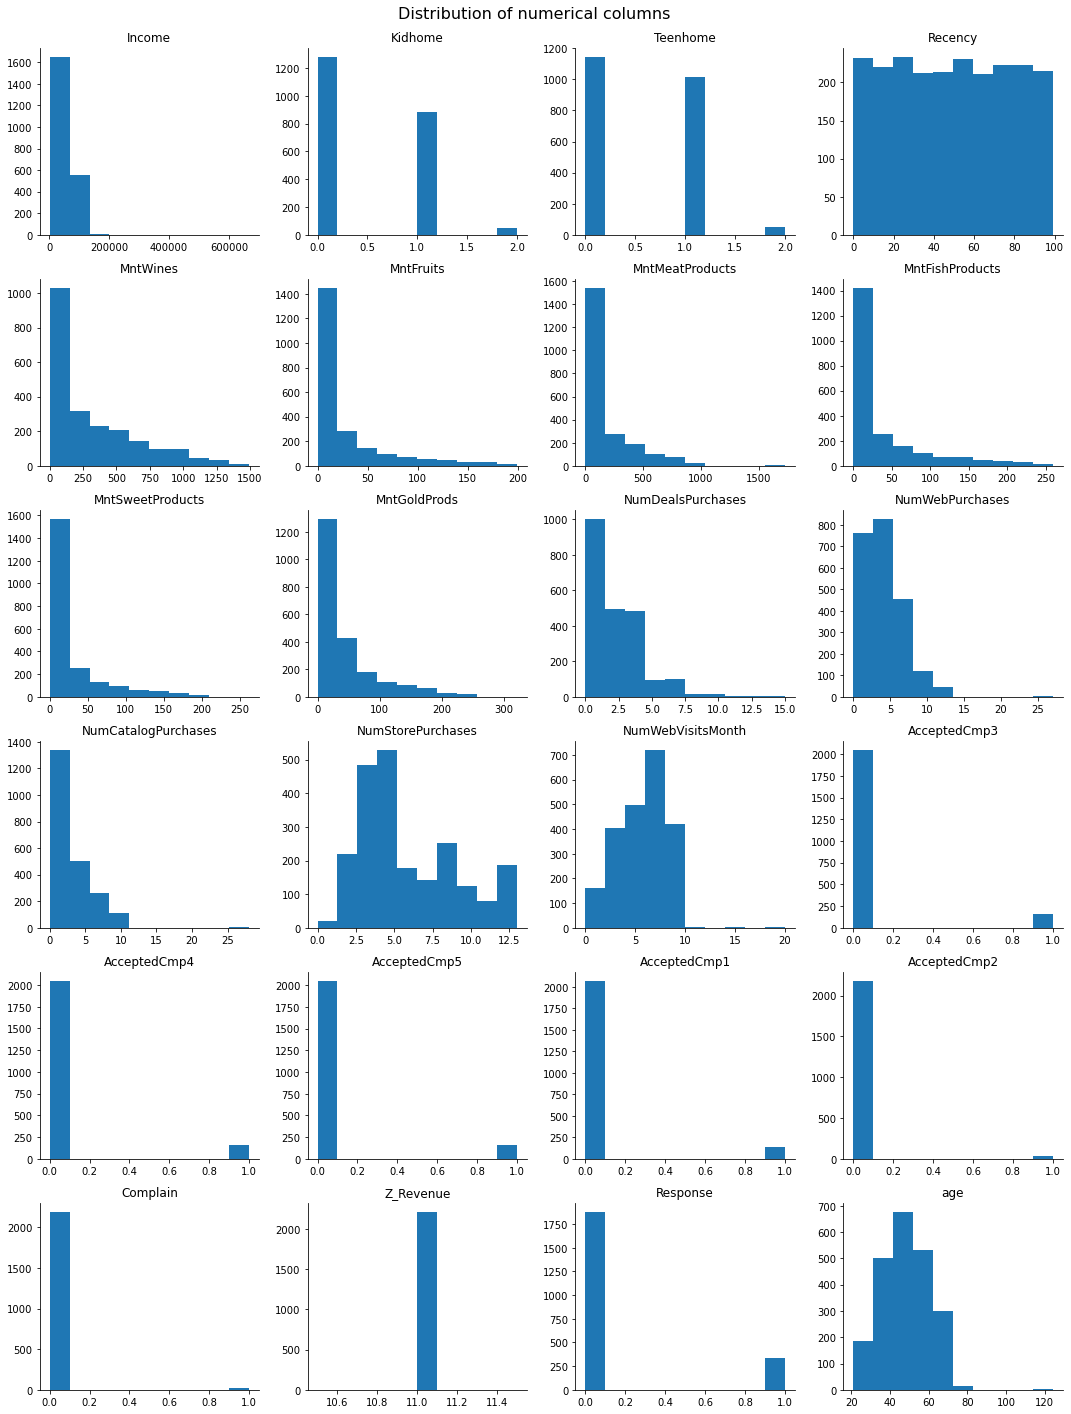

In [15]:
fig, axes = plt.subplots(6, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].hist(df[column])
    axes[idx].set_title(column)
    sns.despine()
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
to_remove = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_Revenue', 'Response']
for item in to_remove:
    list_to_plot.remove(item)

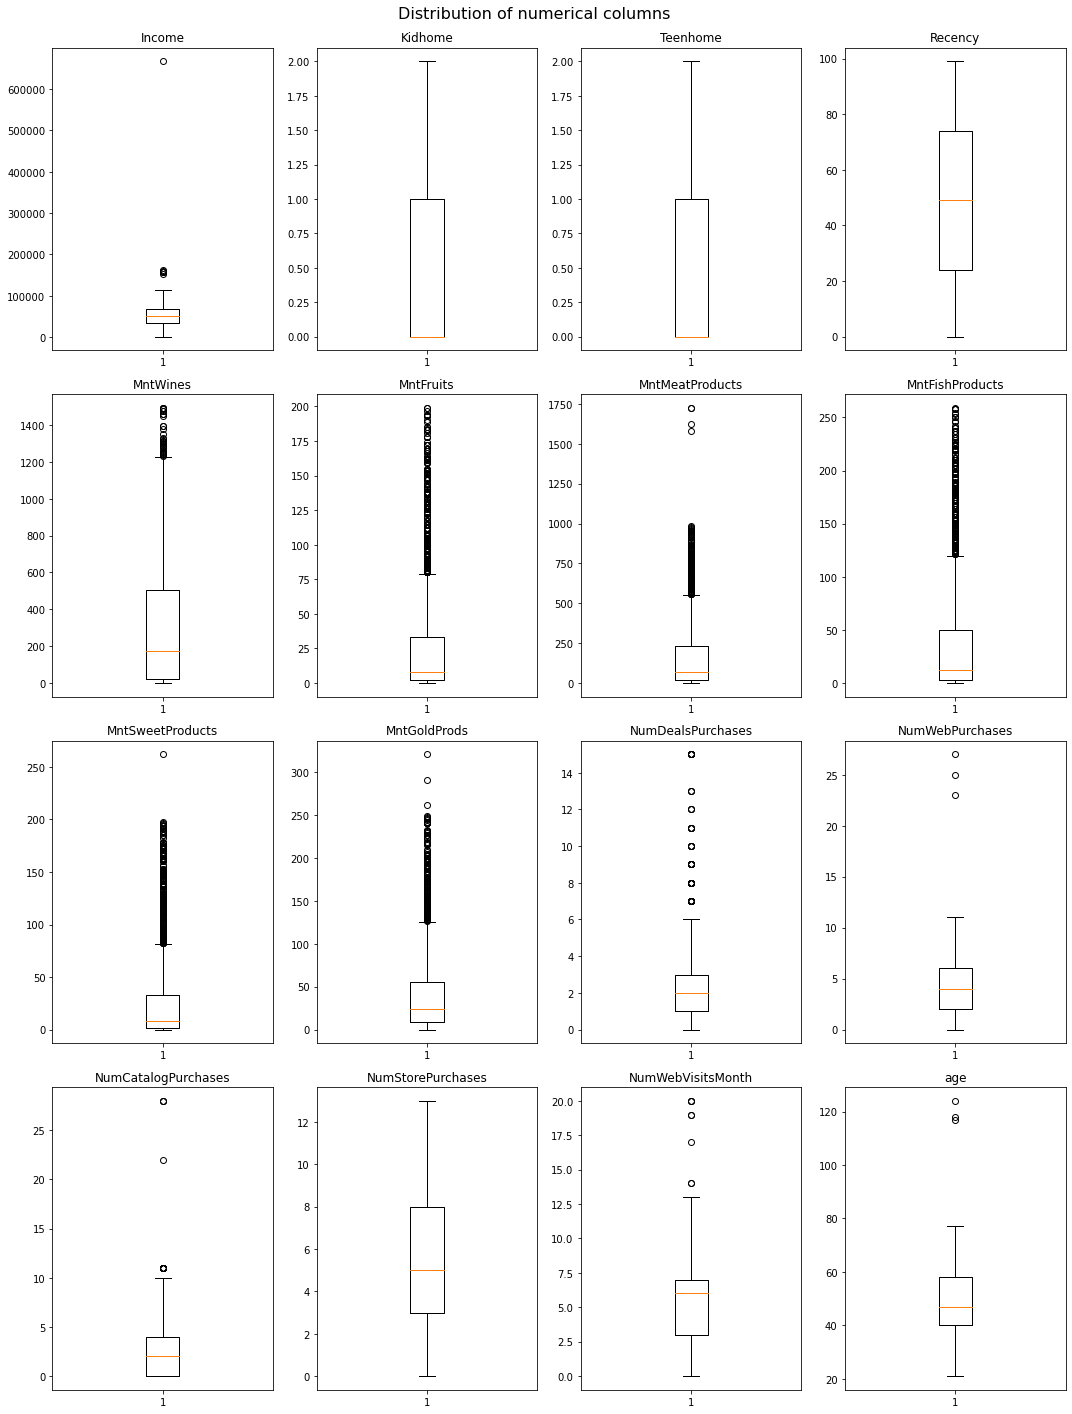

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].boxplot(df[column])
    axes[idx].set_title(column)
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

## Categorical columns

In [18]:
df.drop(index=df[df['Marital_Status'] == 'YOLO'].index, inplace=True)
df.drop(index=df[df['Marital_Status'] == 'Absurd'].index, inplace=True)

In [19]:
df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Together', 'Married', df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Alone', 'Single', df['Marital_Status'])

In [20]:
categorical_columns = df.select_dtypes(include="object_").columns.tolist()

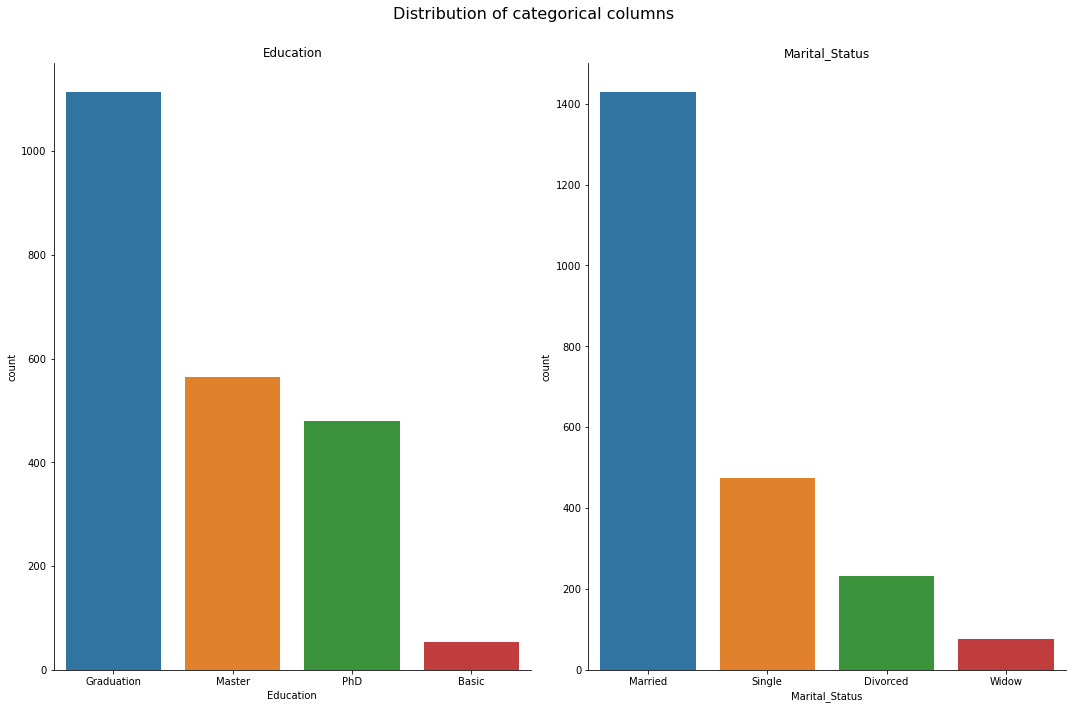

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.flatten()
for idx, column in enumerate(categorical_columns):
    #axes[idx].bar(x=df[column].value_counts().index, height=df[column].value_counts())
    sns.countplot(ax=axes[idx], x=column, data=df, order=df[column].value_counts().index)
    axes[idx].set_title(column)
    sns.despine()
fig.suptitle('Distribution of categorical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

Let's now try to get some insights from this categories

In [22]:
categories_for_insight = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

In [23]:
serie = pd.Series(index=df['Dt_Customer'], dtype='int')
temp = serie.resample('M').count()

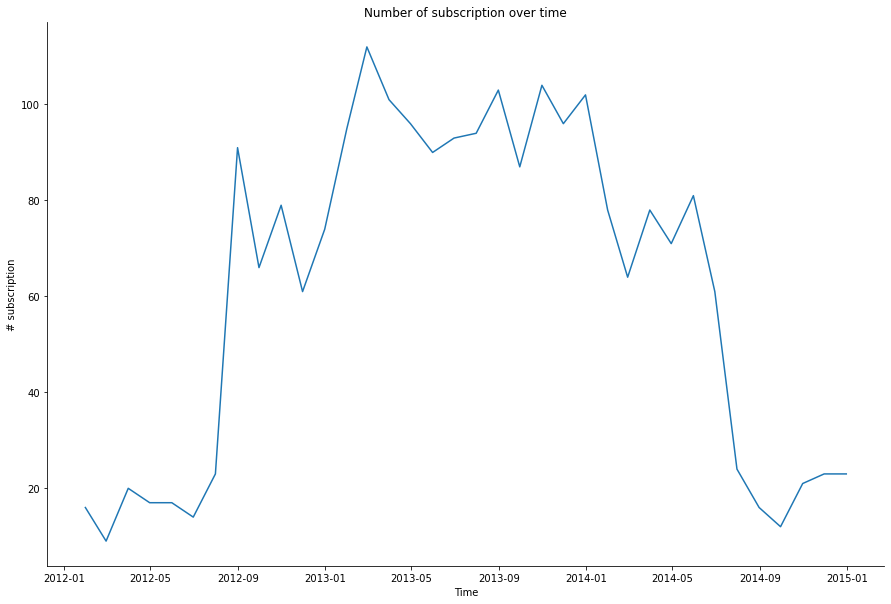

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(temp)
plt.title('Number of subscription over time')
plt.xlabel('Time')
plt.ylabel('# subscription')
sns.despine()
plt.show()

In [25]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age'],
      dtype='object')

Let's do some simple feature engineering on the datetime column and extract month and year.

In [26]:
df['Dt_MONTH'] = df['Dt_Customer'].dt.month
df['Dt_YEAR'] = df['Dt_Customer'].dt.year
df.drop(columns=['ID', 'Dt_Customer'], axis=1, inplace=True)

In [27]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Dt_MONTH,Dt_YEAR
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,60,4,2012
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,63,8,2014
2,Graduation,Married,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,52,8,2013
3,Graduation,Married,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,33,10,2014
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,36,1,2014


In [28]:
column_average = ['Income', 'Recency', 'MntWines', 'MntFruits', 
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

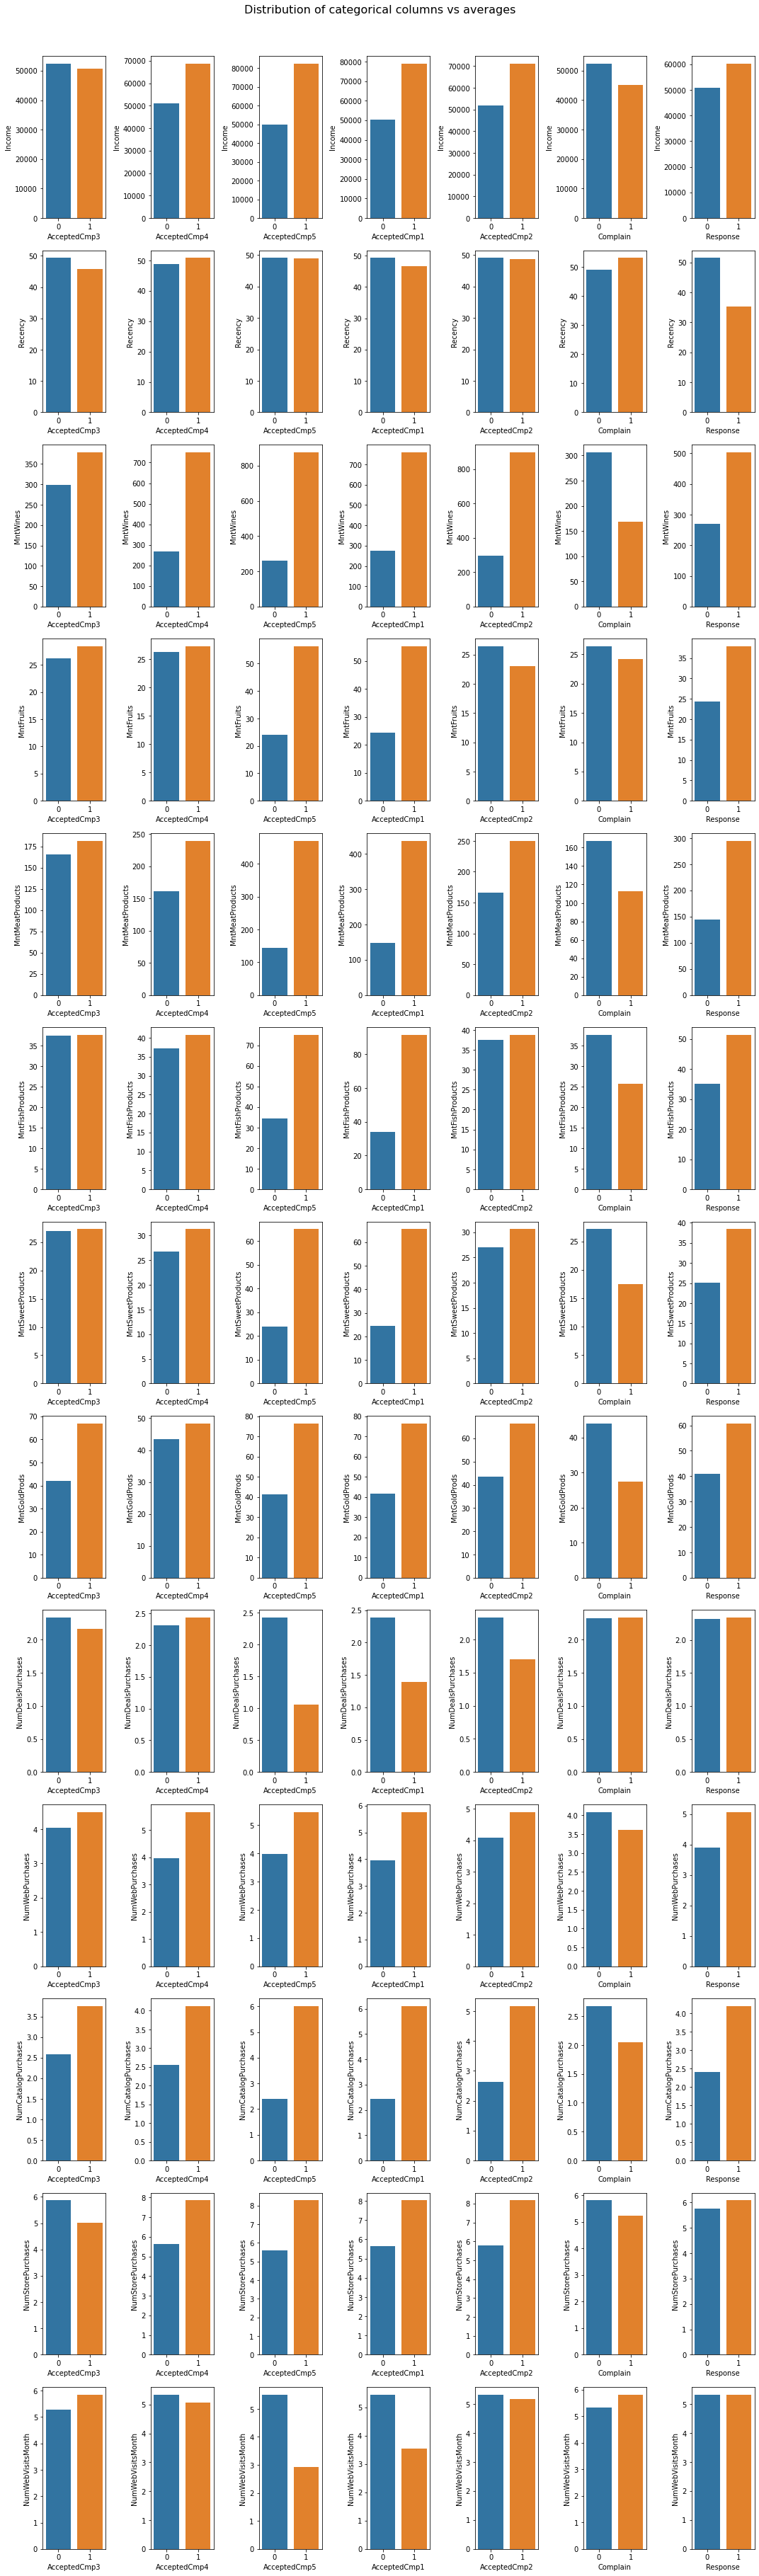

In [29]:
fig, axes = plt.subplots(13, 7, figsize=(15, 50))
for i, column in enumerate(column_average):
    for j, insight in enumerate(categories_for_insight):
        sns.barplot(ax=axes[i][j], y=df.groupby([insight])[column].mean(), x=df.groupby([insight])[column].mean().index)
fig.suptitle('Distribution of categorical columns vs averages', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

In [30]:
column_cat = ['Education', 'Marital_Status','Dt_MONTH', 'Dt_YEAR']

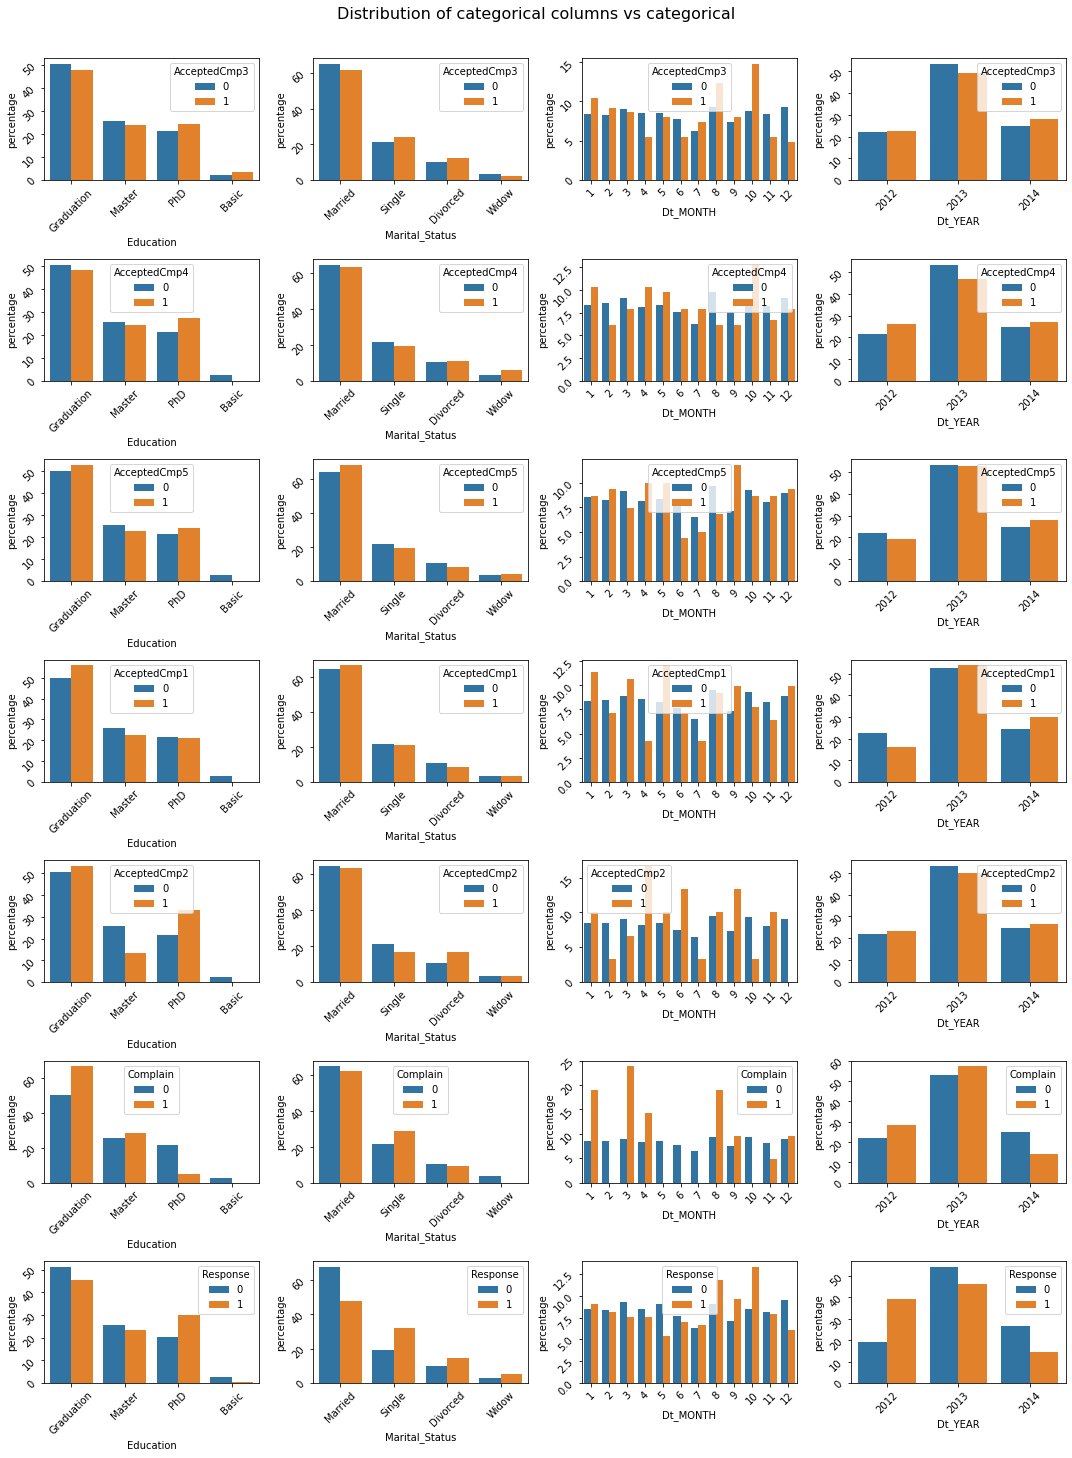

In [31]:
fig, axes = plt.subplots(7, 4, figsize=(15, 20))
for i, column in enumerate(column_cat):
    for j, insight in enumerate(categories_for_insight):
        temp_df = df.groupby([insight])[column].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
        sns.barplot(ax=axes[j][i], data=temp_df, x=column, y='percentage', hue=insight)
        axes[j][i].tick_params(rotation=45)
fig.suptitle('Distribution of categorical columns vs categorical', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

## More Feature Engineering

### Education Column and Marital Status column

In [32]:
# Instantiate OHE and drop one column for collinearity
ohe = OneHotEncoder(drop='first')
# OHE on columns Education and Marital Status
edu = df.loc[:, ['Education', 'Marital_Status']]
ohe_edu = ohe.fit_transform(edu)

In [33]:
edu

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Married
3,Graduation,Married
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Married
2237,Graduation,Divorced
2238,Master,Married


In [34]:
df_edu = pd.DataFrame(ohe_edu.toarray().astype(int), columns=ohe.get_feature_names_out(), dtype=int)
df_edu

,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,1,0,0,0,1,0
1,1,0,0,0,1,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,0,0,1,1,0,0
...,...,...,...,...,...,...
2207,1,0,0,1,0,0
2208,0,0,1,1,0,0
2209,1,0,0,0,0,0
2210,0,1,0,1,0,0


In [35]:
df = pd.concat([df.reset_index(drop=True), df_edu], axis=1)

In [36]:
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status'], axis=1, inplace=True)

In [37]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Dt_MONTH,Dt_YEAR,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,60,4,2012,1,0,0,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,63,8,2014,1,0,0,0,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,52,8,2013,1,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,33,10,2014,1,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,36,1,2014,0,0,1,1,0,0


## Class Balance

Let's first check the class balance of our target column

In [38]:
balance = df['Response'].value_counts(normalize=True).mul(100).reset_index()

In [39]:
balance

,index,Response
0,0,85.036166
1,1,14.963834


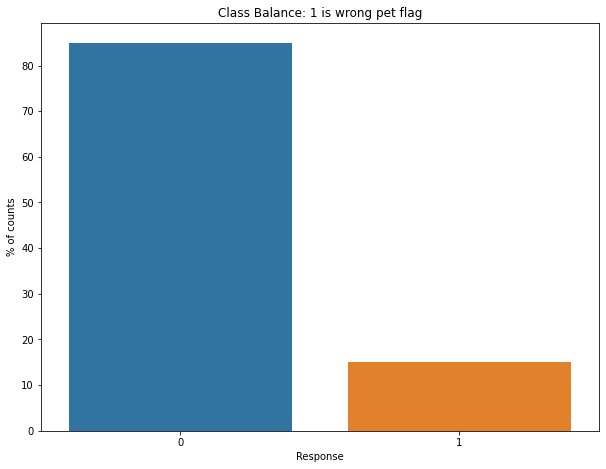

In [40]:
plt.figure(figsize=(10, 7.5))
sns.barplot(data=balance, x='index', y='Response')
plt.title('Class Balance: 1 is wrong pet flag')
plt.xlabel('Response')
plt.ylabel('% of counts')
plt.show()

The data is imbalanced. 85% is class 0 (didin't respond to the offer) while only 15% is class 1 (responsed).

We'll work with this later on. 

## Split dataset

In [41]:
X = df.drop(columns='Response')
y = df['Response']

In [42]:
print(X.shape, y.shape)

(2212, 30) (2212,)


In [43]:
# Split the data with 33% to test and keepinf the same balance that we have in y (Target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [44]:
print(X_train.shape, y_train.shape)

(1482, 30) (1482,)


In [45]:
print(X_test.shape, y_test.shape)

(730, 30) (730,)


# Ensamble methods

## Boosting

Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

For our example we will use XGBoost.

### XGBOOST

In [46]:
XGB_model = XGBClassifier(use_label_encoder=False, eta=0.1, objective='reg:squarederror', max_depth=3)
XGB_model.fit(X_train, y_train)
print(f"XG Boost score TRAIN SET: {XGB_model.score(X_train, y_train)}")
print(f"XG Boost score TEST SET: {XGB_model.score(X_test, y_test)}")

XG Boost score TRAIN SET: 0.9379217273954116
XG Boost score TEST SET: 0.8863013698630137


The test accuracy is the best so far wit all the model we have tried to this point.

In [47]:
y_train_XGB_pred = XGB_model.predict(X_train)
y_test_pred = XGB_model.predict(X_test)

In [48]:
print(classification_report(y_train, y_train_XGB_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1260
           1       0.97      0.60      0.74       222

    accuracy                           0.94      1482
   macro avg       0.95      0.80      0.85      1482
weighted avg       0.94      0.94      0.93      1482



In [49]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       621
           1       0.74      0.37      0.49       109

    accuracy                           0.89       730
   macro avg       0.82      0.67      0.71       730
weighted avg       0.87      0.89      0.87       730



Also the precision is good. Unfortunately, recall is still quite low.

This is due to the class imbalance that we have to dela with.

In [50]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,607,14
Actual 1,69,40


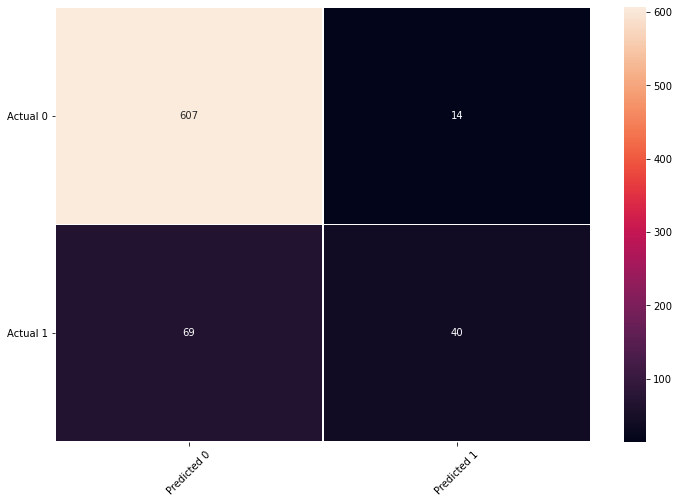

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

## Bagging

Bagging, also known as Bootstrap Aggregation is the ensemble technique used by random forest. Bagging chooses a random sample from the data set. Hence each model is generated from the samples (Bootstrap Samples) provided by the Original Data with replacement known as row sampling. This step of row sampling with replacement is called bootstrap. Now each model is trained independently which generates results. The final output is based on majority voting after combining the results of all models. This step which involves combining all the results and generating output based on majority voting is known as aggregation.

### Random Forest

In [52]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train, y_train)
print(f"XG Boost score TRAIN SET: {RF_model.score(X_train, y_train)}")
print(f"XG Boost score TEST SET: {RF_model.score(X_test, y_test)}")

XG Boost score TRAIN SET: 0.99527665317139
XG Boost score TEST SET: 0.8794520547945206


In [53]:
y_train_RF_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)

The test accuracy is not as good as with XGBoost.

In [54]:
print(classification_report(y_train, y_train_RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1260
           1       0.99      0.98      0.98       222

    accuracy                           1.00      1482
   macro avg       0.99      0.99      0.99      1482
weighted avg       1.00      1.00      1.00      1482



In [55]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       621
           1       0.71      0.32      0.44       109

    accuracy                           0.88       730
   macro avg       0.80      0.65      0.69       730
weighted avg       0.86      0.88      0.86       730



Like for XGBoost, also the precision is good. Unfortunately, recall is still quite low.

Again, this is due to the class imbalance that we have to dela with.

In [56]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,607,14
Actual 1,74,35


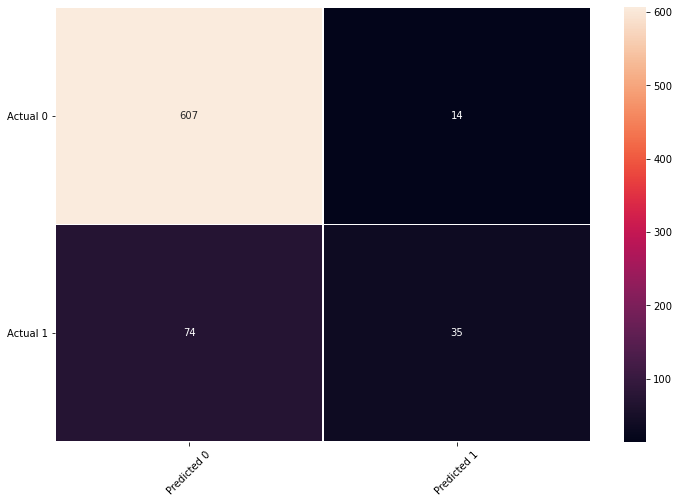

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()